In this tutorial, we will analyze Desmoid dataset from the [WORC Database](https://github.com/MStarmans91/WORCDatabase/tree/development).

The task is to correctly identify segmented lesions as either **desmoid-type fibromatosis** or **extremity soft-tissue sarcoma**.


More details on the dataset as well as the original analysis performed by their authors can be found here:

`Starmans, M. P. A. et al. (2021). The WORC* database: MRI and CT scans, segmentations, and clinical labels for 932 patients from six radiomics studies. Submitted, preprint available from https://doi.org/10.1101/2021.08.19.21262238`

`The experiments are described in the following paper: Starmans, M. P. A. et al. (2021). Reproducible radiomics through automated machine learning validated on twelve clinical applications. Submitted, preprint available from https://arxiv.org/abs/2108.08618.`

In [ ]:
# In case you haven't installed AutoRadiomics
%pip install autorad

In [1]:
import pandas as pd
from pathlib import Path
from autorad.external.download_WORC import download_WORCDatabase

# Set where we will save our data and results
base_dir = Path.cwd() / "autorad_tutorial"
data_dir = base_dir / "data"
result_dir = base_dir / "results"
data_dir.mkdir(exist_ok=True, parents=True)
result_dir.mkdir(exist_ok=True, parents=True)

%load_ext autoreload
%autoreload 2

In [ ]:
# download data (it may take a few minutes)
download_WORCDatabase(
    dataset="Desmoid",
    data_folder=data_dir,
    n_subjects=100,
    )

In [2]:
!ls $data_dir

Desmoid-004  Desmoid-038  Desmoid-082  Desmoid-111  Desmoid-147  Desmoid-177
Desmoid-006  Desmoid-039  Desmoid-084  Desmoid-112  Desmoid-150  Desmoid-179
Desmoid-009  Desmoid-040  Desmoid-088  Desmoid-113  Desmoid-152  Desmoid-180
Desmoid-011  Desmoid-043  Desmoid-091  Desmoid-114  Desmoid-153  Desmoid-182
Desmoid-014  Desmoid-046  Desmoid-093  Desmoid-115  Desmoid-154  Desmoid-183
Desmoid-016  Desmoid-054  Desmoid-095  Desmoid-116  Desmoid-159  Desmoid-184
Desmoid-017  Desmoid-055  Desmoid-096  Desmoid-119  Desmoid-162  Desmoid-185
Desmoid-021  Desmoid-056  Desmoid-098  Desmoid-121  Desmoid-163  Desmoid-189
Desmoid-022  Desmoid-059  Desmoid-100  Desmoid-122  Desmoid-165  Desmoid-190
Desmoid-023  Desmoid-060  Desmoid-101  Desmoid-126  Desmoid-166  Desmoid-193
Desmoid-024  Desmoid-062  Desmoid-102  Desmoid-128  Desmoid-169  Desmoid-194
Desmoid-025  Desmoid-068  Desmoid-103  Desmoid-129  Desmoid-170  Desmoid-195
Desmoid-026  Desmoid-071  Desmoid-104  Desmoid-130  Desmoid-171  Desmoid-198

In [3]:
from autorad.utils.preprocessing import get_paths_with_separate_folder_per_case

# create a table with all the paths
paths_df = get_paths_with_separate_folder_per_case(data_dir, relative=True)
paths_df.sample(5)

,ID,image_path,segmentation_path
15,Desmoid-177,Desmoid-177/image.nii.gz,Desmoid-177/segmentation.nii.gz
18,Desmoid-182,Desmoid-182/image.nii.gz,Desmoid-182/segmentation.nii.gz
17,Desmoid-102,Desmoid-102/image.nii.gz,Desmoid-102/segmentation.nii.gz
27,Desmoid-147,Desmoid-147/image.nii.gz,Desmoid-147/segmentation.nii.gz
51,Desmoid-056,Desmoid-056/image.nii.gz,Desmoid-056/segmentation.nii.gz


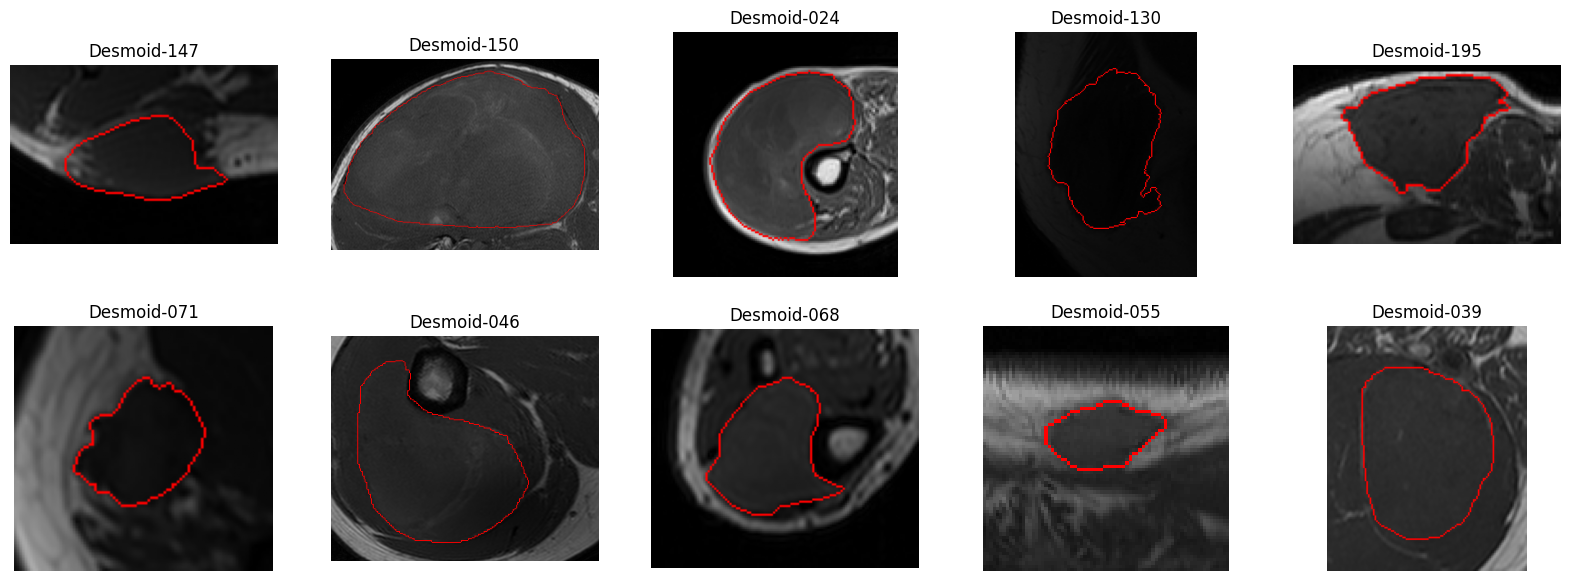

In [4]:
from autorad.data import ImageDataset
from autorad.feature_extraction import FeatureExtractor
import logging

logging.getLogger().setLevel(logging.CRITICAL)

image_dataset = ImageDataset(
    paths_df,
    ID_colname="ID",
    root_dir=data_dir,
)

# Let's take a look at the data, plotting random 10 cases
image_dataset.plot_examples(n=10, window=None)

In [5]:
extractor = FeatureExtractor(image_dataset, extraction_params="MR_default.yaml", n_jobs=4)
feature_df = extractor.run()

QUEUEING TASKS | : 100it [00:00, 4275.67it/s]
PROCESSING TASKS | : 100%|██████████| 100/100 [00:19<00:00,  5.10it/s]
COLLECTING RESULTS | : 100%|██████████| 100/100 [00:00<00:00, 558495.87it/s]
2023/02/18 14:52:41 INFO mlflow.tracking.fluent: Experiment with name 'feature_extraction' does not exist. Creating a new experiment.


In [6]:
feature_df.head()

,ID,image_path,segmentation_path,extraction_ID,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,...,wavelet-LLL_gldm_LargeDependenceLowGrayLevelEmphasis,wavelet-LLL_gldm_LowGrayLevelEmphasis,wavelet-LLL_gldm_SmallDependenceEmphasis,wavelet-LLL_gldm_SmallDependenceHighGrayLevelEmphasis,wavelet-LLL_gldm_SmallDependenceLowGrayLevelEmphasis,wavelet-LLL_ngtdm_Busyness,wavelet-LLL_ngtdm_Coarseness,wavelet-LLL_ngtdm_Complexity,wavelet-LLL_ngtdm_Contrast,wavelet-LLL_ngtdm_Strength
0,Desmoid-101,/home/pw-research/git/autorad-master/examples/...,/home/pw-research/git/autorad-master/examples/...,a6e6248c8823406fa483da631aedb623,0.734207,0.643212,16.489190,25.635685,35.37742924521226,24.648782931414686,...,0.006653812203935318,0.006528848083417591,0.8960396039603961,20192.5099009901,0.00649760705328816,0.0031217534283874294,0.022552373354591062,275191.468879254,10.934495838582922,448.94719187658467
1,Desmoid-122,/home/pw-research/git/autorad-master/examples/...,/home/pw-research/git/autorad-master/examples/...,a6e6248c8823406fa483da631aedb623,0.760332,0.580826,38.768917,66.747900,90.70830710998888,79.6029996469709,...,0.06270229740365418,0.004573374086410759,0.24770997833687783,147.10687252041188,0.0016110926026796544,0.2278592244958744,0.002077073190364377,6580.7368625857325,0.04162106604907501,11.206509013222739
2,Desmoid-128,/home/pw-research/git/autorad-master/examples/...,/home/pw-research/git/autorad-master/examples/...,a6e6248c8823406fa483da631aedb623,0.475148,0.152487,9.391069,61.585961,59.558515179994586,56.13569925141795,...,0.01934856310430424,0.0062809749159487135,0.6689845618612743,1048.3300255490326,0.004845835328826184,0.04366079301086871,0.013788848595645593,26591.77575360583,0.9958304210173656,42.982431678230334
3,Desmoid-014,/home/pw-research/git/autorad-master/examples/...,/home/pw-research/git/autorad-master/examples/...,a6e6248c8823406fa483da631aedb623,0.373535,0.000000,0.000000,37.633214,16.0,30.0,...,0.021321300132347575,0.020897906257085458,0.8594104308390024,6091.298185941043,0.020801192642660456,0.0036841713659147867,0.06730840774569981,21498.71792676084,4.102797694068337,347.5427978272928
4,Desmoid-074,/home/pw-research/git/autorad-master/examples/...,/home/pw-research/git/autorad-master/examples/...,a6e6248c8823406fa483da631aedb623,0.873614,0.718321,77.484876,107.869387,125.29964086141668,123.54756169184401,...,0.09364225285965076,0.0020106471542853657,0.1604221958125694,154.59031374778954,0.0004037488625501188,0.7482961240892383,0.0004442332208722315,5875.243768469462,0.024981087368858863,2.3650769782697085


In [7]:
label_df = pd.read_csv(data_dir / "labels.csv")
label_df.sample(5)

,patient_ID,diagnosis
80,Desmoid-170,0
41,Desmoid-116,1
7,Desmoid-056,1
74,Desmoid-193,0
5,Desmoid-037,1


In [8]:
from autorad.data import FeatureDataset

merged_feature_df = feature_df.merge(label_df, left_on="ID",
    right_on="patient_ID", how="left")
feature_dataset = FeatureDataset(
    merged_feature_df,
    target="diagnosis",
    ID_colname="ID"
)

Split the data into training/validation/test sets with stratification:

In [9]:
splits_path = result_dir / "splits.yaml"
feature_dataset.split(method="train_val_test", save_path=splits_path)

{'split_type': 'stratified split: 60% train + 20% validation + 20% test',
 'train': ['Desmoid-177',
  'Desmoid-004',
  'Desmoid-179',
  'Desmoid-030',
  'Desmoid-023',
  'Desmoid-084',
  'Desmoid-165',
  'Desmoid-043',
  'Desmoid-115',
  'Desmoid-017',
  'Desmoid-183',
  'Desmoid-195',
  'Desmoid-169',
  'Desmoid-102',
  'Desmoid-113',
  'Desmoid-074',
  'Desmoid-055',
  'Desmoid-107',
  'Desmoid-103',
  'Desmoid-193',
  'Desmoid-068',
  'Desmoid-025',
  'Desmoid-152',
  'Desmoid-170',
  'Desmoid-199',
  'Desmoid-166',
  'Desmoid-022',
  'Desmoid-082',
  'Desmoid-056',
  'Desmoid-076',
  'Desmoid-201',
  'Desmoid-162',
  'Desmoid-093',
  'Desmoid-112',
  'Desmoid-108',
  'Desmoid-134',
  'Desmoid-026',
  'Desmoid-128',
  'Desmoid-024',
  'Desmoid-062',
  'Desmoid-171',
  'Desmoid-141',
  'Desmoid-175',
  'Desmoid-185',
  'Desmoid-173',
  'Desmoid-147',
  'Desmoid-095',
  'Desmoid-182',
  'Desmoid-060',
  'Desmoid-059',
  'Desmoid-110',
  'Desmoid-159',
  'Desmoid-037',
  'Desmoid-153',

In [10]:
from autorad.models import MLClassifier

models = MLClassifier.initialize_default_sklearn_models()
print(models)

[Random Forest, Logistic Regression, SVM, XGBoost]


In [23]:
from autorad.preprocessing import run_auto_preprocessing

run_auto_preprocessing(
    data=feature_dataset.data,
    use_feature_selection=True,
    feature_selection_methods=["anova", "lasso", "boruta", None],
    use_oversampling=False,
    result_dir=result_dir,
    )

In [24]:
from autorad.training import Trainer

trainer = Trainer(
    dataset=feature_dataset,
    models=models,
    result_dir=result_dir,
)

experiment_name = "WORC_tutorial"

trainer.set_optimizer("optuna", n_trials=100)
trainer.run(auto_preprocess=True, experiment_name=experiment_name)

[02/18/23 15:02:49] WARNING  Running training in existing experiment.                                 ]8;id=468917;file:///home/pw-research/git/autorad-master/autorad/training/trainer.py\trainer.py]8;;\:]8;id=647203;file:///home/pw-research/git/autorad-master/autorad/training/trainer.py#87\87]8;;\

2023-02-18 15:02:49.409 WARNING autorad.training.trainer: Running training in existing experiment.
[I 2023-02-18 15:02:49,417] A new study created in memory with name: tutorial_WORC
[I 2023-02-18 15:02:49,427] Trial 0 finished with value: 0.3296703296703297 and parameters: {'feature_selection_method': 'anova', 'oversampling_method': None, 'model': 'SVM', 'svm_kernel': 'sigmoid', 'svm_C': 4.386283874551565, 'svm_gamma': 0.5977192881990739, 'svm_degree': 2}. Best is trial 0 with value: 0.3296703296703297.
[I 2023-02-18 15:02:49,438] Trial 1 finished with value: 0.6813186813186813 and parameters: {'feature_selection_method': 'anova', 'oversampling_method': None, 'model': 'SVM', 'svm_kernel': 'poly', 'svm_C': 2.2834040455586773, 'svm_gamma': 2.937846749841905, 'svm_degree': 4}. Best is trial 1 with value: 0.6813186813186813.
[I 2023-02-18 15:02:50,235] Trial 2 finished with value: 0.5 and parameters: {'feature_selection_method': None, 'oversampling_method': None, 'model': 'XGBoost', 'xgb_l

In [25]:
from autorad.visualization import plotly_utils
from autorad.inference import infer_utils
from autorad import evaluation

artifacts = infer_utils.get_artifacts_from_best_run(experiment_name)

result_df = evaluation.evaluate_feature_dataset(
    dataset=feature_dataset,
    model=artifacts["model"],
    preprocessor=artifacts["preprocessor"],
)

plotly_utils.plot_roc_curve(result_df.y_true, result_df.y_pred_proba)

loaded_name model
loaded_name model
loaded_name masker
loaded_name data
loaded_name max_samples
loaded_name clustering
loaded_name link


In [22]:
result_df

,ID,y_true,y_pred_proba
0,10,0,0.630187
1,21,1,0.631908
2,24,0,0.631682
3,33,1,0.634059
4,42,1,0.640577
5,44,1,0.632585
6,47,1,0.633450
7,49,0,0.632027
8,52,0,0.626909
9,53,1,0.636692
